# Demo Notebook

This notebook demonstrates a toolkit for text data analysis in Digital Humanities research. It is aimed at easy and efficient parsing, cleaning and analyzing of data. The package focuses on tabular text data.

In [1]:
from src.toolkit import visualization,config,dataloader,distinctiveness,collocation, frequency

vs = visualization.Style()
vs.set_default()

## Loading Configuration
Set paths to text data, stopword files etc. in a json-formatted text file for easy access.

In [2]:
config_json = config.load('config.json')

## Loading Data
Load your data by pointing to a folder with text files. Data cleaning based on stopwords and Part-of-Speech tags can also be done.

In [3]:
dl = dataloader.DataLoader(
                           year_range=(1945,1950),
                           text_column='lemm_cleaned',
                           data_path=config_json['text_data_path'],
                           stopword_path=config_json['stopword_path'],
                           load_text=True
                           )
dl.load_pos(pos_path=config_json['pos_path'])
dl.load()
dl.clean(remove_stopwords=True,pos_types='all')
data  = dl.data

	 > loading data ...


100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


	 > cleaning data ...


## Counting Words
The basis of text mining: count words easily.

In [15]:
fq = frequency.Frequency(data,'lemm_cleaned','date','party-ref','year')
fq.get_total_tokens()
fq.count_word('parlement')

<AxesSubplot:xlabel='date'>

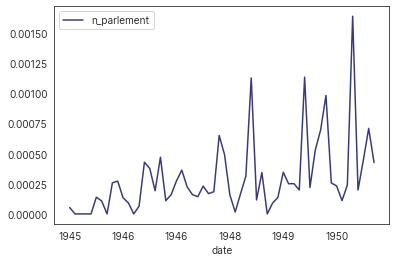

In [16]:
fq.dataframe.plot(x='date',y='n_parlement')

## Finding Distinctive Terms

Textual difference forms the basis for computational humanistic inquiry. Here we use log likelihood estimates to find terms distinctive for a specific category.

In [18]:
dst = distinctiveness.Distinctiveness(dataframe=data,type_column='party-ref',text_column='lemm_cleaned')
dst.fit_vectorizer(max_features=10000,ngram_range=(1,2))
dst_df = dst.get_likelihoods()

	 > fitting word counts in CountVectorizer ...
	 > calculating word-level log likelihood scores ...


In [25]:
dst.lls_df[dst.lls_df['type'] == 'nl.p.sgp'].sort_values(0,ascending=False).head(10)

,0,1,type
0,1760.616336,gods,nl.p.sgp
1,885.451924,soekarno,nl.p.sgp
2,872.715838,indie,nl.p.sgp
3,720.397738,gods woord,nl.p.sgp
4,666.871833,god,nl.p.sgp
5,631.941132,bepleiten,nl.p.sgp
6,603.965708,zandt,nl.p.sgp
7,599.205547,dewijl,nl.p.sgp
8,534.289608,afvaardigen,nl.p.sgp
9,527.582844,zondag,nl.p.sgp


## Finding Collocates

Co-occurrences can be used to estimate the relatedness of two terms based on the observed co-occurrence compared to the expected co-occurrence. Simply pass your data and choose a collocation metric and a window.

In [4]:
clc = collocation.Collocation(data=data,text_column='lemm_cleaned',measure='pmi')
clc.find_collocates()
clc.score_collocates()

In [9]:
clc.find_term('gordijn',direction='right')

{('ijzer', 'gordijn'): 14.040790792101298}